# Data analysis with ALFALFA & SDSS

## Import

In [98]:
from astropy.io import fits
from astropy.table import Table
from astropy.visualization import astropy_mpl_style
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import zoom, rotate

In [55]:
plt.style.use(astropy_mpl_style)

In [16]:
nsa_dat = Table.read("./data/nsa_v1_0_1.fits", format="fits")

In [152]:
nsa_df = nsa_dat[["IAUNAME", "PID", "AID", "RA", "DEC", "ZDIST", "MAG", "SERSIC_N", "SERSIC_BA", "SERSIC_TH50", "SERSIC_PHI", "IALFALFA"]].to_pandas()

In [153]:
nsa_df

,IAUNAME,PID,AID,RA,DEC,ZDIST,MAG,SERSIC_N,SERSIC_BA,SERSIC_TH50,SERSIC_PHI,IALFALFA
0,b'J094651.40-010228.5',36,0,146.714215,-1.041280,0.020688,15.178774,4.776152,0.665165,5.882104,15.978210,-1
1,b'J094630.85-004554.5',29,0,146.628585,-0.765162,0.064036,17.318521,2.222374,0.278542,3.291051,86.211060,-1
2,b'J094631.59-005917.7',33,0,146.631706,-0.988347,0.052031,18.123354,0.883118,0.454037,2.817786,163.904358,-1
3,b'J094744.18-004013.4',10,0,146.934129,-0.670405,0.120650,17.660961,6.000000,0.927469,2.365968,151.608215,-1
4,b'J094751.74-003242.0',30,0,146.963500,-0.544776,0.055362,17.616278,0.500000,0.463153,5.957229,135.733917,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
641404,b'J235101.08-100042.7',30,0,357.755712,-10.010851,0.074767,17.445000,1.730513,0.435391,10.630543,58.612122,-1
641405,b'J235247.10-105259.6',25,0,358.197549,-10.883763,0.076552,16.902000,1.467699,0.618548,11.401611,167.957855,-1
641406,b'J235320.91-103238.7',40,0,358.336971,-10.544118,0.077557,19.254999,0.733040,0.290098,3.973276,59.589600,-1
641407,b'J235406.94-102419.7',75,0,358.530488,-10.405839,0.075259,18.534000,1.685543,0.780133,159.757812,119.685852,-1


In [142]:
alf_df = pd.read_csv("data/a100.code12.table2.190808.csv")

In [143]:
alf_df

,AGCNr,Name,RAdeg_HI,DECdeg_HI,RAdeg_OC,DECdeg_OC,Vhelio,W50,sigW,W20,HIflux,sigflux,SNR,RMS,Dist,sigDist,logMH,siglogMH,HIcode
0,105367,........,0.00167,5.44333,0.00333,5.44250,11983,274,39,281,1.14,0.08,8.1,1.91,166.0,2.3,9.87,0.05,1
1,333313,........,0.00375,24.90889,359.99750,24.90750,11181,313,20,333,1.80,0.09,11.3,2.02,154.8,2.3,10.01,0.05,1
2,331060,478-009b,0.01042,23.08472,0.01417,23.08750,4463,160,4,184,1.96,0.07,14.7,2.35,50.6,10.4,9.07,0.18,1
3,331061,456-013.,0.01042,15.87222,0.00875,15.88167,6007,260,45,268,1.13,0.09,6.5,2.40,85.2,2.4,9.29,0.06,1
4,104570,........,0.00667,32.70834,0.00500,32.71028,10614,245,6,250,0.86,0.07,6.6,1.86,147.0,2.3,9.64,0.06,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31497,331054,517-008.,359.92041,34.34722,359.92877,34.34528,4900,84,14,152,2.24,0.07,23.3,2.33,69.5,2.3,9.41,0.05,1
31498,331052,Eder.Dw.,359.93500,27.25778,359.93750,27.25389,4692,61,2,75,0.58,0.04,7.6,1.95,66.5,2.3,8.78,0.06,1
31499,334869,........,359.96167,21.55028,359.96042,21.55611,10432,171,9,185,0.97,0.07,7.7,2.14,144.0,2.3,9.68,0.06,1
31500,332965,........,359.98166,5.23889,359.97873,5.23889,3038,124,9,158,1.18,0.06,13.4,1.76,42.8,2.3,8.71,0.07,1


## Filtering

### 1. ALFALFA

#### 1) Filtering by Quality (`HIcode > 1`)

In [26]:
alf_filter1 = alf_df[alf_df["HIcode"] > 1]
alf_filter1

,AGCNr,Name,RAdeg_HI,DECdeg_HI,RAdeg_OC,DECdeg_OC,Vhelio,W50,sigW,W20,HIflux,sigflux,SNR,RMS,Dist,sigDist,logMH,siglogMH,HIcode
23,101866,........,0.20875,14.27000,0.19958,14.27750,10877,291,149,312,0.79,0.11,4.1,2.52,150.3,2.4,9.62,0.08,2
27,331943,........,0.22667,18.50250,0.22667,18.50611,16678,157,7,168,0.81,0.08,5.9,2.45,233.2,2.3,10.02,0.06,2
47,331079,I1526...,0.37917,11.34472,0.38083,11.34583,9121,262,7,267,1.03,0.09,6.1,2.33,125.2,2.2,9.58,0.06,2
64,331088,433-017.,0.50500,12.51722,0.51583,12.53056,7928,307,19,313,0.93,0.10,4.9,2.41,108.1,2.2,9.41,0.07,2
75,331092,N7811...,0.59917,3.35944,0.61042,3.35194,7687,206,32,248,1.02,0.09,6.3,2.51,104.7,2.2,9.42,0.06,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31473,630775,........,359.72626,0.19361,359.74335,0.17083,7065,359,94,367,1.56,0.16,5.1,3.61,95.8,2.2,9.53,0.07,2
31482,730035,........,359.82376,0.83972,359.85291,0.85389,16271,71,23,85,0.72,0.09,4.9,3.87,227.3,2.4,9.94,0.07,2
31487,332891,........,359.84918,16.10889,359.85876,16.12083,12801,178,45,242,0.88,0.08,6.2,2.35,177.8,2.3,9.82,0.06,2
31494,332895,........,359.89627,14.15278,359.89709,14.14694,11923,178,11,189,0.63,0.09,4.1,2.58,165.2,2.2,9.61,0.08,2


#### 2) Filtering by Distance (`Dist <= 250`)

In [28]:
alf_filter2 = alf_filter1[alf_filter1["Dist"] <= 250]
alf_filter2

,AGCNr,Name,RAdeg_HI,DECdeg_HI,RAdeg_OC,DECdeg_OC,Vhelio,W50,sigW,W20,HIflux,sigflux,SNR,RMS,Dist,sigDist,logMH,siglogMH,HIcode
23,101866,........,0.20875,14.27000,0.19958,14.27750,10877,291,149,312,0.79,0.11,4.1,2.52,150.3,2.4,9.62,0.08,2
27,331943,........,0.22667,18.50250,0.22667,18.50611,16678,157,7,168,0.81,0.08,5.9,2.45,233.2,2.3,10.02,0.06,2
47,331079,I1526...,0.37917,11.34472,0.38083,11.34583,9121,262,7,267,1.03,0.09,6.1,2.33,125.2,2.2,9.58,0.06,2
64,331088,433-017.,0.50500,12.51722,0.51583,12.53056,7928,307,19,313,0.93,0.10,4.9,2.41,108.1,2.2,9.41,0.07,2
75,331092,N7811...,0.59917,3.35944,0.61042,3.35194,7687,206,32,248,1.02,0.09,6.3,2.51,104.7,2.2,9.42,0.06,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31473,630775,........,359.72626,0.19361,359.74335,0.17083,7065,359,94,367,1.56,0.16,5.1,3.61,95.8,2.2,9.53,0.07,2
31482,730035,........,359.82376,0.83972,359.85291,0.85389,16271,71,23,85,0.72,0.09,4.9,3.87,227.3,2.4,9.94,0.07,2
31487,332891,........,359.84918,16.10889,359.85876,16.12083,12801,178,45,242,0.88,0.08,6.2,2.35,177.8,2.3,9.82,0.06,2
31494,332895,........,359.89627,14.15278,359.89709,14.14694,11923,178,11,189,0.63,0.09,4.1,2.58,165.2,2.2,9.61,0.08,2


### 2. NSA

#### 1) Filtering by major-minor ratio (`b/a == 0.15`)

In [154]:
nsa_filter1 = nsa_df[nsa_df["SERSIC_BA"] == 0.15]
nsa_filter1

,IAUNAME,PID,AID,RA,DEC,ZDIST,MAG,SERSIC_N,SERSIC_BA,SERSIC_TH50,SERSIC_PHI,IALFALFA
26,b'J094728.34-002912.2',19,0,146.869063,-0.487805,0.082651,18.409582,5.627937,0.15,17.743937,141.969635,-1
47,b'J094622.67-000759.3',29,0,146.594503,-0.133150,0.045041,17.663818,0.880785,0.15,8.639677,161.202545,-1
87,b'J094454.67+000236.8',9,0,146.227812,0.043543,0.090784,18.150541,3.761645,0.15,0.326435,150.839294,-1
114,b'J094223.17-011219.0',1,0,145.596577,-1.205294,0.146688,19.056208,5.951607,0.15,0.237484,51.000824,-1
132,b'J094312.29-001239.9',2,0,145.801271,-0.211080,0.144246,18.630928,1.514362,0.15,3.107101,71.324890,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
641111,b'J125417.27-005845.1',49,0,193.572684,-0.979529,0.070136,18.937000,0.500000,0.15,5.164344,129.561920,-1
641352,b'J143105.87-014056.9',78,0,217.774451,-1.682417,0.056606,18.042000,1.430221,0.15,4.269559,171.858643,-1
641381,b'J143506.20-002406.3',23,0,218.775998,-0.403149,0.123833,18.870001,4.841252,0.15,28.577719,178.988739,-1
641400,b'J231115.05-085824.5',60,0,347.812433,-8.972778,0.064001,17.607000,0.802575,0.15,8.280889,151.980713,-1


#### 2) Filtering by magnitude (`MAG >= 17.7`)

In [155]:
nsa_filter2 = nsa_filter1[nsa_filter1["MAG"] >= 17.7]
nsa_filter2

,IAUNAME,PID,AID,RA,DEC,ZDIST,MAG,SERSIC_N,SERSIC_BA,SERSIC_TH50,SERSIC_PHI,IALFALFA
26,b'J094728.34-002912.2',19,0,146.869063,-0.487805,0.082651,18.409582,5.627937,0.15,17.743937,141.969635,-1
87,b'J094454.67+000236.8',9,0,146.227812,0.043543,0.090784,18.150541,3.761645,0.15,0.326435,150.839294,-1
114,b'J094223.17-011219.0',1,0,145.596577,-1.205294,0.146688,19.056208,5.951607,0.15,0.237484,51.000824,-1
132,b'J094312.29-001239.9',2,0,145.801271,-0.211080,0.144246,18.630928,1.514362,0.15,3.107101,71.324890,-1
242,b'J094430.32+004528.3',13,0,146.126366,0.757901,0.123512,18.575302,3.238054,0.15,1.041662,108.253906,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
641101,b'J125709.39+015510.3',10,0,194.289912,1.919817,0.133482,19.198999,0.500000,0.15,55.649300,56.626740,-1
641111,b'J125417.27-005845.1',49,0,193.572684,-0.979529,0.070136,18.937000,0.500000,0.15,5.164344,129.561920,-1
641352,b'J143105.87-014056.9',78,0,217.774451,-1.682417,0.056606,18.042000,1.430221,0.15,4.269559,171.858643,-1
641381,b'J143506.20-002406.3',23,0,218.775998,-0.403149,0.123833,18.870001,4.841252,0.15,28.577719,178.988739,-1


#### 3) Filtering by ALFALFA matching (`IALFALFA != -1`)

In [156]:
nsa_filter3 = nsa_filter2[nsa_filter2["IALFALFA"] != -1]
nsa_filter3

,IAUNAME,PID,AID,RA,DEC,ZDIST,MAG,SERSIC_N,SERSIC_BA,SERSIC_TH50,SERSIC_PHI,IALFALFA
638229,b'J114622.90+134937.0',156,0,176.602043,13.828219,0.008929,25.0,1.088799,0.15,21.861582,66.332825,63
638234,b'J115315.89+113810.9',145,0,178.313923,11.634224,0.009016,25.0,0.852409,0.15,22.065138,104.441650,68
638264,b'J121546.99+104137.0',15,4,183.942531,10.700086,0.006946,25.0,0.500000,0.15,35.953842,160.689362,113
638284,b'J122722.09+105154.0',148,1,186.842825,10.866743,0.003793,25.0,1.078689,0.15,20.837786,53.510498,162
638368,b'J230253.49+260051.0',164,0,345.723669,26.014707,0.043688,25.0,2.349619,0.15,17.158985,173.434174,290
638394,b'J001905.80+263728.0',141,0,4.773825,26.627015,0.039751,25.0,0.592564,0.15,17.220350,176.836731,336
638404,b'J002812.89+261236.0',181,0,7.053346,26.209317,0.035116,25.0,0.500000,0.15,148.840744,72.543823,354
638448,b'J025609.20+274210.9',134,0,44.034665,27.700649,0.022242,25.0,0.671264,0.15,16.204275,93.595978,486
638494,b'J114609.20+125230.0',100,0,176.536061,12.880246,0.011686,25.0,0.627330,0.15,16.457920,116.039581,613
638495,b'J114440.59+144550.9',226,0,176.171404,14.765881,0.033695,25.0,0.560441,0.15,14.566313,82.491943,617


In [165]:
nsa_catalog = nsa_filter3[["IAUNAME", "PID", "AID"]]
nsa_catalog["IAUNAME"] = nsa_catalog["IAUNAME"].str.decode("utf-8")

<ipython-input-165-5ae632b0907c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nsa_catalog["IAUNAME"] = nsa_catalog["IAUNAME"].str.decode("utf-8")


In [166]:
nsa_catalog

,IAUNAME,PID,AID
638229,J114622.90+134937.0,156,0
638234,J115315.89+113810.9,145,0
638264,J121546.99+104137.0,15,4
638284,J122722.09+105154.0,148,1
638368,J230253.49+260051.0,164,0
638394,J001905.80+263728.0,141,0
638404,J002812.89+261236.0,181,0
638448,J025609.20+274210.9,134,0
638494,J114609.20+125230.0,100,0
638495,J114440.59+144550.9,226,0


In [167]:
nsa_catalog.to_csv("catalog.csv", sep=',', index=False)

In [135]:
alf_df.iloc[1734,:]

AGCNr             586
Name         ........
RAdeg_HI      14.2658
DECdeg_HI     7.32056
RAdeg_OC      14.2558
DECdeg_OC     7.32917
Vhelio          11681
W50               339
sigW               28
W20               373
HIflux           1.88
sigflux          0.11
SNR               9.9
RMS               2.3
Dist            162.1
sigDist           2.2
logMH           10.07
siglogMH         0.05
HIcode              1
Name: 1734, dtype: object

In [136]:
nsa_filter3.index

Int64Index([638229, 638234, 638264, 638284, 638368, 638394, 638404, 638448,
            638494, 638495, 638517, 638681, 638691, 638762, 638776, 638799,
            638806, 638847, 638848, 638877, 638878],
           dtype='int64')

## Plotting

In [88]:
img = fits.getdata("images/J115315.89+113810.9-r.fits",1)
img

array([[1229.2303, 1302.2571, 1226.967 , ..., 1201.9512, 1166.898 ,
        1165.7089],
       [1220.8647, 1199.0476, 1228.0515, ..., 1162.0985, 1170.9236,
        1202.2036],
       [1144.8726, 1170.4144, 1214.2915, ..., 1238.4188, 1260.0312,
        1236.0322],
       ...,
       [1220.2559, 1138.2393, 1175.0258, ..., 1267.4557, 1184.0813,
        1184.913 ],
       [1197.447 , 1153.8176, 1229.8193, ..., 1198.9694, 1220.5345,
        1287.1451],
       [1232.7262, 1159.6095, 1237.7411, ..., 1125.9153, 1142.0461,
        1182.1997]], dtype=float32)

In [128]:
img_i = fits.getdata("images/J115315.89+113810.9-i.fits",1)
img_i

array([[403.72888, 391.2916 , 416.15405, ..., 411.58963, 419.30087,
        396.32635],
       [408.41006, 412.35333, 402.3352 , ..., 409.6837 , 441.8955 ,
        408.156  ],
       [408.2703 , 402.27246, 380.95773, ..., 422.20795, 392.25858,
        401.70654],
       ...,
       [583.85345, 602.76764, 594.40656, ..., 594.3465 , 575.23254,
        590.8846 ],
       [578.77313, 596.1264 , 581.20215, ..., 602.5672 , 592.54095,
        586.2194 ],
       [583.68756, 583.37823, 575.4012 , ..., 571.27185, 591.6333 ,
        585.0848 ]], dtype=float32)

In [89]:
img_t = np.transpose(img)

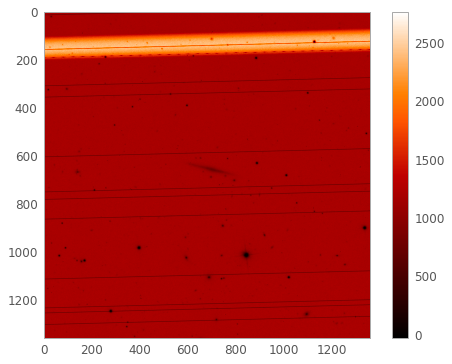

In [90]:
plt.figure()
plt.imshow(img)
plt.colorbar()
plt.grid(False)
plt.show()

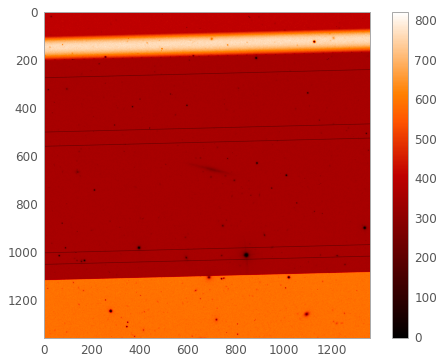

In [129]:
plt.figure()
plt.imshow(img_i)
plt.colorbar()
plt.grid(False)
plt.show()

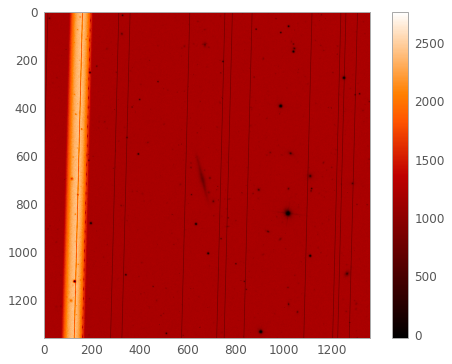

In [91]:
plt.figure()
plt.imshow(img_t)
plt.colorbar()
plt.grid(False)
plt.show()

In [99]:
rotated_img = rotate(img, 104.44165)

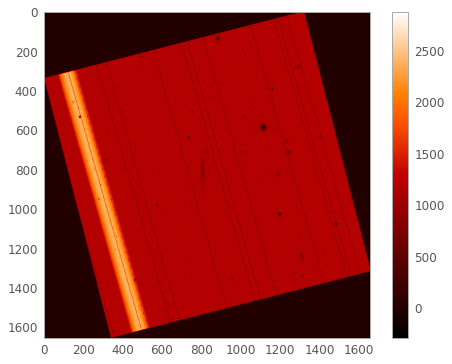

In [100]:
plt.figure()
plt.imshow(rotated_img)
plt.colorbar()
plt.grid(False)
plt.show()

In [101]:
rotated_img_t = np.transpose(rotated_img)

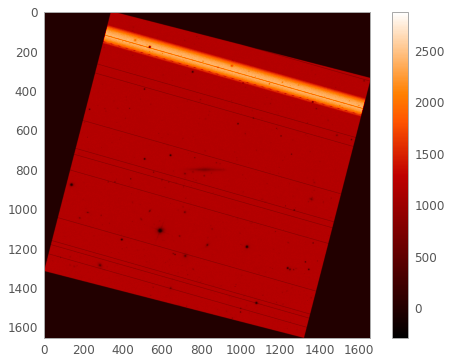

In [102]:
plt.figure()
plt.imshow(rotated_img_t)
plt.colorbar()
plt.grid(False)
plt.show()

In [103]:
def clipped_zoom(img, zoom_factor, **kwargs):

    h, w = img.shape[:2]

    # For multichannel images we don't want to apply the zoom factor to the RGB
    # dimension, so instead we create a tuple of zoom factors, one per array
    # dimension, with 1's for any trailing dimensions after the width and height.
    zoom_tuple = (zoom_factor,) * 2 + (1,) * (img.ndim - 2)

    # Zooming out
    if zoom_factor < 1:

        # Bounding box of the zoomed-out image within the output array
        zh = int(np.round(h * zoom_factor))
        zw = int(np.round(w * zoom_factor))
        top = (h - zh) // 2
        left = (w - zw) // 2

        # Zero-padding
        out = np.zeros_like(img)
        out[top:top+zh, left:left+zw] = zoom(img, zoom_tuple, **kwargs)

    # Zooming in
    elif zoom_factor > 1:

        # Bounding box of the zoomed-in region within the input array
        zh = int(np.round(h / zoom_factor))
        zw = int(np.round(w / zoom_factor))
        top = (h - zh) // 2
        left = (w - zw) // 2

        out = zoom(img[top:top+zh, left:left+zw], zoom_tuple, **kwargs)

        # `out` might still be slightly larger than `img` due to rounding, so
        # trim off any extra pixels at the edges
        trim_top = ((out.shape[0] - h) // 2)
        trim_left = ((out.shape[1] - w) // 2)
        out = out[trim_top:trim_top+h, trim_left:trim_left+w]

    # If zoom_factor == 1, just return the input array
    else:
        out = img
    return out

In [112]:
zoomed_img = clipped_zoom(rotated_img_t, 2.2)

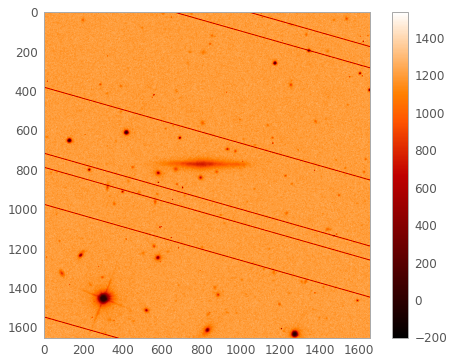

In [113]:
plt.figure()
plt.imshow(zoomed_img)
plt.colorbar()
plt.grid(False)
plt.show()

In [122]:
cropped_img = rotated_img_t[700:900, 680:960]

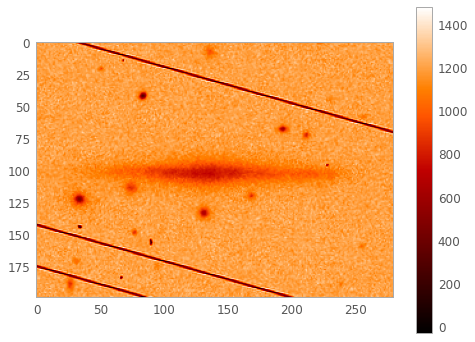

In [123]:
plt.figure()
plt.imshow(cropped_img)
plt.colorbar()
plt.grid(False)
plt.show()